<a id='BacktoTop'></a>
# Lab One: Visualization and Data Preprocessing
## MSDS 7331: Data Mining
## Dr. Drew
## Group 3: Shanqing Gu, Manisha Pednekar, Dmitry Andreev and Jonathan Knowles

*Analysis of Online News Popularity Dataset (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity): explore the statistical summaries of the features, visualize the attributes, and make conclusions from the visualizations and analysis*


<a id='BusinessUnderstanding'></a>
### 01. Business Understanding (10)
[Back to top](#BacktoTop)

#### Section Objective:
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific *


##### Purpose of this data set
This Online News Popularity Dataset was acquisited from [Mashable](https://mashable.com) 

The data set is available for download at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

This data set contains contains nearly 40 thousand records with 61 attributes that provide details and meta-data about articles that were published by Mashable over a two year period. The goal of collecting this data was to predict the number of shares in social networks (measuring popularity).
[might need to include a citation?]



##### Defining and measuring outcomes of this data set
Our group would like to create a classification model that can determine if an article will be popular based on the amount of times it is shared on social media. We have determined that an article can be classified as popular if it is shared X number of times. 

###### Why is this data important?
This data is important because it can be used to help Mashable and other online publishers understand the factors that play a part in how popular their articles are.  With a reliable model for predicting popularity Mashable will understand how they can design articles to achieve maximum popularity and exposure, which is the key objective of any publishing company.

###### How will we measure the effectiveness of our alogrithm? 
We will measure the effectiveness of our alorithm by the accuracy of its classification, we feel that a model that achieves a success rate of ?% would qualify as an effective model.

## Table of Contents
1. [Business Understanding](#BusinessUnderstanding)
2. [Data Mining Type](#DataMiningType)
3. [Data Quality](#DataQuality)
4. [Simple Statistics](#SimpleStatistics)
5. [Visualize Attributes](#VisualizeAttributes)
6. [Explore Joint Relationships](#ExploreJointAttributes)
7. [Explore Attributes and Class](#ExploreAttributesandClass)
8. [New Features](#NewFeatures)
9. [Exceptional Work](#ExceptionalWork)

In [1]:
# Import libraries which will be uses for Lab_01 project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
# Read csv file
df = pd.read_csv("/Users/shanqinggu/Desktop/OnlineNewsPopularity.csv") 

# Exclude url and timedelta columns, read from n_tokens_title
df = df.loc[:, ' n_tokens_title':]

dfCopy = df.copy()
#dfCopy.info() # use df.tail() to read from the bottom

<a id='DataMiningType'></a>
## 02. Data Mining Type (10)
[Back to top](#BacktoTop)

* Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 

### Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field) 

0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 

####Below is a table of the variables remaining in the dataset. We list the variable name, type of data, scale(min, mean, median and max), and a description.

In [3]:
##Description: Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
#Below is a table of all of the variables in the dataset. We list the variable name, type of data, 
#scale(min, mean, median and max), and a description.
#Souce of this code: By Yao Yao(Data Science SMU student) used for Zillow data mining project
from IPython.display import display, HTML

variables_description = [
[' n_tokens_title', 'ratio', 'TBD', 'Number of words in the title']
,[' n_tokens_content', 'ratio', 'TBD', 'Number of words in the content 0-8500 ']
,[' n_unique_tokens', 'ratio', 'TBD', 'Rate of unique words in the content']
,[' n_non_stop_words', 'ratio', 'TBD', 'Rate of non-stop words in the content']
,[' n_non_stop_unique_tokens', 'ratio', 'TBD', 'Rate of unique non-stop words in the content']
,[' num_hrefs', 'ratio', 'TBD', 'Number of links']
,[' num_self_hrefs', 'ratio', 'TBD', 'Number of links to other articles published by Mashable']
,[' num_imgs', 'ratio', 'TBD', 'Number of images']
,[' num_videos', 'ratio', 'TBD', 'Number of videos']
,[' average_token_length', 'ratio', 'TBD', '(Binary) Average length of the words in the content']
,[' num_keywords', 'ratio', 'TBD', '(Binary) Number of keywords in the metadata']
,[' data_channel_is_lifestyle', 'nominal', 'TBD', '(Binary) Is data channel Lifestyle?']
,[' data_channel_is_entertainment', 'nominal', 'TBD', '(Binary) Is data channel Entertainment?']
,[' data_channel_is_bus', 'nominal', 'TBD', '(Binary) Is data channel Business?']
,[' data_channel_is_socmed', 'nominal', 'TBD', '(Binary) Is data channel Social Media? ']
,[' data_channel_is_tech', 'nominal', 'TBD', '(Binary) Is data channel Tech?']
,[' data_channel_is_world', 'nominal', 'TBD', '(Binary) Is data channel World?']
,[' kw_min_min', 'ratio', 'TBD', 'Worst keyword (min. shares)']
,[' kw_max_min', 'ratio', 'TBD', 'Worst keyword (max. shares)']
,[' kw_avg_min', 'ratio', 'TBD', 'Worst keyword (avg. shares)']
,[' kw_min_max', 'ratio', 'TBD', 'Best keyword (min. shares)']
,[' kw_max_max', 'ratio', 'TBD', 'Best keyword (max. shares)']
,[' kw_avg_max', 'ratio', 'TBD', 'Best keyword (avg. shares)']
,[' kw_min_avg', 'ratio', 'TBD', 'Avg. keyword (min. shares)']
,[' kw_max_avg', 'ratio', 'TBD', 'Avg. keyword (max. shares)']
,[' kw_avg_avg', 'ratio', 'TBD', 'Avg. keyword (avg. shares)']
,[' self_reference_min_shares', 'ratio', 'TBD', 'Min. shares of referenced articles in Mashable']
,[' self_reference_max_shares', 'ratio', 'TBD', 'Max. shares of referenced articles in Mashable']
,[' self_reference_avg_sharess', 'ratio', 'TBD', 'Error or the Zillow model response variable']
,[' weekday_is_monday', 'nominal', 'TBD', '(Binary) Was the article published on a Monday? ']
,[' weekday_is_tuesday', 'nominal', 'TBD', '(Binary) Was the article published on a Tuesday? ']
,[' weekday_is_wednesday', 'nominal', 'TBD', '(Binary) Was the article published on a Wednesday?']
,[' weekday_is_thursday', 'nominal', 'TBD', '(Binary) Was the article published on a Thursday?']
,[' weekday_is_friday', 'nominal', 'TBD', '(Binary) Was the article published on a Friday? ']
,[' weekday_is_saturday', 'nominal', 'TBD', '(Binary) Was the article published on a Saturday? ']
,[' weekday_is_sunday', 'nominal', 'TBD', '(Binary) Was the article published on a Sunday? ']
,[' is_weekend', 'nominal', 'TBD', '(Binary) Was the article published on the weekend?']
,[' LDA_00', 'ratio', 'TBD', 'Closeness to LDA topic 0']
,[' LDA_01', 'ratio', 'TBD', 'Closeness to LDA topic 1']
,[' LDA_02', 'ratio', 'TBD', 'Closeness to LDA topic 2']
,[' LDA_03', 'ratio', 'TBD', 'Closeness to LDA topic 3']
,[' LDA_04', 'ratio', 'TBD', 'Closeness to LDA topic 4 ']
,[' global_subjectivity', 'ratio', 'TBD', 'Text subjectivity']
,[' global_sentiment_polarity', 'ratio', 'TBD', 'Text sentiment polarity ']
,[' global_rate_positive_words', 'ratio', 'TBD', 'Rate of positive words in the content ']
,[' global_rate_negative_words', 'ratio', 'TBD', 'Rate of negative words in the content ']
,[' rate_positive_words', 'ratio', 'TBD', 'Rate of positive words among non-neutral tokens']
,[' rate_negative_words', 'ratio', 'TBD', 'Rate of negative words among non-neutral tokens']
,[' avg_positive_polarity', 'ratio', 'TBD', 'Avg. polarity of positive words ']
,[' min_positive_polarity', 'ratio', 'TBD', 'Min. polarity of positive words ']
,[' max_positive_polarity', 'ratio', 'TBD', 'Max. polarity of positive words ']
,[' avg_negative_polarity', 'ratio', 'TBD', 'Avg. polarity of negative words']
,[' min_negative_polarity', 'ratio', 'TBD', 'Min. polarity of negative words']
,[' max_negative_polarity', 'ratio', 'TBD', 'Max. polarity of negative words']
,[' title_subjectivity', 'ratio', 'TBD', 'Title subjectivity']    
,[' title_sentiment_polarity', 'ratio', 'TBD', 'Title polarity']
,[' abs_title_subjectivity', 'ratio', 'TBD', 'Absolute subjectivity level']
,[' abs_title_sentiment_polarity', 'ratio', 'TBD', 'Absolute polarity level']
,[' shares', 'ratio', 'TBD', 'Number of shares (target)']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')
variables = variables.loc[df.columns]

def output_variables_table(variables):
    #variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Description</th></tr>']
    for vname, atts in variables.iterrows():
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = df[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d, %d, %d)' % (df[vname].min(), df[vname].mean(), df[vname].median(), df[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

output_variables_table(variables)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              39644 non-null float64
 data_channel_is_socmed           39644 non-null float64
 data_channel_is_tech             39

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   ...      min_positive_polarity  \
0          0.0               4.680365   ...                   0.100000   
1          0.0               4.913725   ...                   0.033333   
2          0.0               4.393365   ...                   0.100000   
3          0.0               4.404896   ...                   0.136364   
4          0.0               4.682836   ...                   0.033333   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   
4                     1.0               -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                 0.000000                       0.187500      593  
1                 0.500000                       0.000000      711  
2                 0.500000                       0.000000     1500  
3                 0.500000                       0.000000     1200  
4                 0.045455                       0.136364      505  

[5 rows x 59 columns]

In [5]:
# Strip the empty space in varible names

df.columns = df.columns.str.replace(' ', '')

In [6]:
# Combine and make 'channel'

Lifestyle_df=df[df['data_channel_is_lifestyle']==1].copy()
Lifestyle_df['Channel']='Lifestyle'

Entertainment_df=df[df['data_channel_is_entertainment']==1].copy()
Entertainment_df['Channel']='Entertainment'

Bus_df=df[df['data_channel_is_bus']==1].copy()
Bus_df['Channel']='Bus'

Socmed_df=df[df['data_channel_is_socmed']==1].copy()
Socmed_df['Channel']='Socmedia'

Tech_df=df[df['data_channel_is_tech']==1].copy()
Tech_df['Channel']='Tech'

World_df=df[df['data_channel_is_world']==1].copy()
World_df['Channel']='World'

df=pd.concat([Lifestyle_df,Entertainment_df,Bus_df,Socmed_df,Tech_df,World_df],axis=0)

In [7]:
# Combine and make 'Weekday'

Monday_df=df[df['weekday_is_monday']==1].copy()
Monday_df['Weekday']='Monday'

Tuesday_df=df[df['weekday_is_tuesday']==1].copy()
Tuesday_df['Weekday']='Tuesday'

Wednesday_df=df[df['weekday_is_wednesday']==1].copy()
Wednesday_df['Weekday']='Wednesday'

Thursday_df=df[df['weekday_is_thursday']==1].copy()
Thursday_df['Weekday']='Thursday'

Friday_df=df[df['weekday_is_friday']==1].copy()
Friday_df['Weekday']='Friday'

Saturday_df=df[df['weekday_is_saturday']==1].copy()
Saturday_df['Weekday']='Saturday'

Sunday_df=df[df['weekday_is_sunday']==1].copy()
Sunday_df['Weekday']='Sunday'

df=pd.concat([Monday_df,Tuesday_df,Wednesday_df,Thursday_df,Friday_df,Saturday_df,Sunday_df],axis=0)

In [10]:
# Check column location and prepare to drop
df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]]

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],
      dtype='object')

In [11]:
# Remove previous channel and weekly columns
df.drop(df.columns[[11, 12, 13, 14, 15, 16, 29, 30, 31,32, 33, 34, 35, 36 ]], axis=1, inplace=True)

<a id='DataQuality'></a>
### 03. Data Quality (15)

#### Section Objective:
Verify data quality: 
1. Explain any missing values, duplicate data, and outliers. Are those mistakes?
    1. To verify the quality of this data set we will:
        1. [Look for the presence of null values](#CheckForNullValues)
        2. [Look for duplicated records](#CheckForDuplicateRecords)
        3. [Look for outliers](#CheckForOutliers)

<a id='CheckForNullValues'></a>
##### Checking for Null Values
[Back to data quality](#BacktoDataQuality)
To perform a check for null values in a data set the *isnull* function from the *pandas* package can be used.

As shown in the code snippet below, there are no null values in this data set. 

In [12]:
# No Missing values in this dataset
pd.isnull(df).sum()

n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
LDA_00                          0
LDA_01                          0
LDA_02                          0
LDA_03                          0
LDA_04                          0
global_subjectivity             0
global_sentime

/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


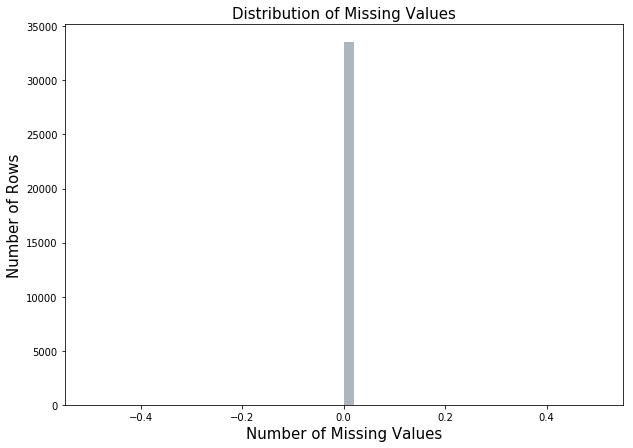

In [13]:
### plotting to make sure there are no missing values in this dataset.
plt.rcParams['figure.figsize'] = [10, 7]

number_missing_per_row = df.isnull().sum(axis=1)
sns.distplot(number_missing_per_row, color="#34495e", kde=False);
plt.title('Distribution of Missing Values', fontsize=15)
plt.xlabel('Number of Missing Values', fontsize=15)
plt.ylabel('Number of Rows', fontsize=15);

<a id='CheckForDuplicateRecords'></a>
##### Checking for Duplicate Records
[Back to data quality](#BacktoDataQuality)
To perform a check for duplicate records in a data set the *dataframe.duplicated* function from the *pandas* package can be used.

As shown in the code snippet below, there are no duplicated records in this data set. 

In [14]:
# No duplicated values in this dataset

df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares, Channel, Weekday]
Index: []

[0 rows x 47 columns]

<a id='CheckForOutliers'></a>
##### Checking for Outliers
[Back to data quality](#BacktoDataQuality)

To perform a check for the presence of outliers in a data set the *dataframe.describe* function from the *pandas* package can be used.

As shown in the code snippet below, the min and max values for each attribute in the data set fall into a reasonable range and do not indicate the presence of any outliers that will impact the effectiveness of the classification model 

In [15]:
# Outliers will be handled by log transformation due to the sample numbers are more than 30k
# Find which variables need to do log transform 

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1)
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0)

df_T["scale"] = ""

df_T.loc[df_T["log"],"scale"] = "log"
df_T.loc[df_T["log+2"],"scale"] = "log+2"

df_T[["mean", "min", "50%", "max", "scale"]]

mean       min            50%  \
n_tokens_title                    10.416204  2.000000      10.000000   
n_tokens_content                 585.438317  0.000000     447.000000   
n_unique_tokens                    0.549702  0.000000       0.532596   
n_non_stop_words                   1.015010  0.000000       1.000000   
n_non_stop_unique_tokens           0.699134  0.000000       0.690411   
num_hrefs                         10.380603  0.000000       7.000000   
num_self_hrefs                     3.368517  0.000000       3.000000   
num_imgs                           3.959445  0.000000       1.000000   
num_videos                         0.998448  0.000000       0.000000   
average_token_length               4.607736  0.000000       4.669471   
num_keywords                       7.177798  1.000000       7.000000   
kw_min_min                        25.539421 -1.000000      -1.000000   
kw_max_min                      1114.712389  0.000000     656.000000   
kw_avg_min                       309.083875 -1.000000     237.316667   
kw_min_max                     12207.393972  0.000000    1300.000000   
kw_max_max                    753337.156073  0.000000  843300.000000   
kw_avg_max                    241773.119564  0.000000  228286.666666   
kw_min_avg                      1031.643292 -1.000000     956.466667   
kw_max_avg                      5161.325150  0.000000    4044.559329   
kw_avg_avg                      2890.423023  0.000000    2737.047950   
self_reference_min_shares       3565.717849  0.000000    1100.000000   
self_reference_max_shares       9594.667448  0.000000    2700.000000   
self_reference_avg_sharess      5820.979727  0.000000    2100.000000   
LDA_00                             0.207364  0.000000       0.040000   
LDA_01                             0.141303  0.000000       0.033339   
LDA_02                             0.245294  0.000000       0.050001   
LDA_03                             0.140653  0.000000       0.033373   
LDA_04                             0.265356  0.000000       0.050763   
global_subjectivity                0.439569  0.000000       0.447111   
global_sentiment_polarity          0.119596 -0.377657       0.119719   
global_rate_positive_words         0.039891  0.000000       0.039164   
global_rate_negative_words         0.016320  0.000000       0.015209   
rate_positive_words                0.695364  0.000000       0.714286   
rate_negative_words                0.288462  0.000000       0.277778   
avg_positive_polarity              0.351704  0.000000       0.354545   
min_positive_polarity              0.091221  0.000000       0.100000   
max_positive_polarity              0.762561  0.000000       0.800000   
avg_negative_polarity             -0.255202 -1.000000      -0.250000   
min_negative_polarity             -0.524040 -1.000000      -0.500000   
max_negative_polarity             -0.104041 -1.000000      -0.100000   
title_subjectivity                 0.265740  0.000000       0.100000   
title_sentiment_polarity           0.068661 -1.000000       0.000000   
abs_title_subjectivity             0.343692  0.000000       0.500000   
abs_title_sentiment_polarity       0.145570  0.000000       0.000000   
shares                          2928.637989  1.000000    1400.000000   

                                        max  scale  
n_tokens_title                    23.000000         
n_tokens_content                8474.000000    log  
n_unique_tokens                  701.000000    log  
n_non_stop_words                1042.000000    log  
n_non_stop_unique_tokens         650.000000    log  
num_hrefs                        304.000000    log  
num_self_hrefs                   116.000000    log  
num_imgs                         128.000000    log  
num_videos                        75.000000    log  
average_token_length               7.695652         
num_keywords                      10.000000         
kw_min_min                       377.000000  log+2  
kw_max_min                    298400.

In [17]:
# Log transform 18 variables. 

df['log_n_tokens_content'] = np.log(df['n_tokens_content'] + 0.1)
df['log_n_unique_tokens'] = np.log(df['n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df['n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df['n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df['num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df['num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df['num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df['num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df['kw_min_min'] + 2)
df['log_kw_max_min'] = np.log(df['kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df['kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df['kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df['kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df['kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df['self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df['self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_sharess'] = np.log(df['self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df['shares'] + 0.1)

In [18]:
# find locations for untransformed

df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]]

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'shares'],
      dtype='object')

In [19]:
# Drop the above

df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 18, 19, 20, 21, 22, 44]], axis=1, inplace=True)

In [20]:
# Check if everything correct so far
df.dtypes

n_tokens_title                    float64
average_token_length              float64
num_keywords                      float64
kw_max_max                        float64
kw_avg_max                        float64
kw_min_avg                        float64
LDA_00                            float64
LDA_01                            float64
LDA_02                            float64
LDA_03                            float64
LDA_04                            float64
global_subjectivity               float64
global_sentiment_polarity         float64
global_rate_positive_words        float64
global_rate_negative_words        float64
rate_positive_words               float64
rate_negative_words               float64
avg_positive_polarity             float64
min_positive_polarity             float64
max_positive_polarity             float64
avg_negative_polarity             float64
min_negative_polarity             float64
max_negative_polarity             float64
title_subjectivity                

In [21]:
df.shape

(33510, 47)

In [23]:
# Linear Regression analysis. This part will be moved to # 9. Put here just to show the process to pick interesting variables.

class_y = df.log_shares
class_X = df.drop(['log_shares', 'Channel', 'Weekday'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
class_X = sm.add_constant(class_X)
ls_model = sm.OLS(class_y.astype(float), class_X.astype(float)).fit()
ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     85.00
Date:                Sat, 15 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:59:45   Log-Likelihood:                -41360.
No. Observations:               33510   AIC:                         8.281e+04
Df Residuals:                   33465   BIC:                         8.319e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.2988      1.665      4.383      0.000       4.035      10.563
n_tokens_title                    -0.0004      0.002     -0.177      0.859      -0.005       0.004
average_token_length              -0.0669      0.021     -3.220      0.001      -0.108      -0.026
num_keywords                       0.0244      0.003      8.104      0.000       0.018       0.030
kw_max_max                     -1.765e-07   4.13e-08     -4.275      0.000   -2.57e-07   -9.56e-08
kw_avg_max                     -2.616e-08   6.48e-08     -0.404      0.686   -1.53e-07    1.01e-07
kw_min_avg                         0.0003   1.19e-05     25.954      0.000       0.000       0.000
LDA_00                            -1.4414      2.079     -0.693      0.488      -5.517       2.634
LDA_01                            -1.8100      2.079     -0.871      0.384      -5.885       2.265
LDA_02                            -1.7942      2.080     -0.863      0.388      -5.871       2.282
LDA_03                            -1.7301      2.079     -0.832      0.405      -5.805       2.345
LDA_04                            -1.4611      2.079     -0.703      0.482      -5.536       2.614
global_subjectivity                0.4215      0.070      6.048      0.000       0.285       0.558
global_sentiment_polarity         -0.0956      0.143     -0.668      0.504      -0.376       0.185
global_rate_positive_words         0.2555      0.603      0.423      0.672      -0.927       1.438
global_rate_negative_words         0.8708      1.186      0.734      0.463      -1.453       3.195
rate_positive_words                0.5442      0.483      1.128      0.259      -0.402       1.490
rate_negative_words                0.3832      0.486      0.788      0.431      -0.570       1.336
avg_positive_polarity             -0.0585      0.111     -0.525      0.599      -0.277       0.160
min_positive_polarity             -0.2368      0.097     -2.451      0.014      -0.426      -0.047
max_positive_polarity             -0.0281      0.034     -0.820      0.412      -0.095       0.039
avg_negative_polarity             -0.0724      0.099     -0.729      0.466      -0.267       0.122
min_negative_polarity             -0.0385      0.036     -1.076      0.282      -0.109       0.032
max_negative_polarity              0.0497      0.087      0.573      0.567      -0.120       0.220
title_subjectivity                 0.0482      0.022      2.169      0.030       0.005       0.092
title_sentiment_polarity           0.0671      0.021      3.209      0.001       0.026       0.108
abs_title_subjectivity             0.1272      0.029      4.315      0.000       0.069       0.185
abs_title_sentiment_polarity       0.0503      0.032      1.558      0.119      -0.013       0.114
log_n_tokens_c

!!! Strong multicollinearity

Choose 20 from above and remove problem varibles based on pairplot (not shown)

average_token_length
num_keywords
kw_max_max
kw_min_avg
global_subjectivity
title_sentiment_polarity
abs_title_subjectivity
log_n_tokens_content
log_n_unique_tokens
log_num_hrefs
log_num_self_hrefs
log_num_imgs
log_num_videos
log_kw_max_min
log_kw_avg_min
log_kw_min_max
log_kw_avg_avg
log_self_reference_min_shares
log_self_reference_max_shares
log_self_reference_avg_sharess

In [24]:
# Remove some varibles after checking pairplot and keep 12 and target 'log_shares'.

df_clean = df[['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
               'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
               'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess', 'log_shares']]

# Recheck linear regression analysis.

clean_y = df_clean.log_shares
clean_X = df_clean.drop(['log_shares'], axis=1) # axis = 1 -  column

import statsmodels.api as sm
clean_X = sm.add_constant(clean_X)
clean_ls_model = sm.OLS(clean_y.astype(float), clean_X.astype(float)).fit()
clean_ls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sat, 15 Sep 2018   Prob (F-statistic):          3.99e-267
Time:                        19:00:18   Log-Likelihood:                -42494.
No. Observations:               33510   AIC:                         8.501e+04
Df Residuals:                   33497   BIC:                         8.512e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.3684      0.082     89.445      0.000       7.207       7.530
average_token_length              -0.1713      0.018     -9.536      0.000      -0.207      -0.136
num_keywords                       0.0221      0.002      8.945      0.000       0.017       0.027
global_subjectivity                0.8297      0.059     14.108      0.000       0.714       0.945
title_sentiment_polarity           0.1496      0.019      7.737      0.000       0.112       0.188
abs_title_subjectivity             0.0832      0.026      3.218      0.001       0.033       0.134
log_n_tokens_content              -0.0130      0.007     -1.775      0.076      -0.027       0.001
log_n_unique_tokens               -0.0737      0.033     -2.265      0.024      -0.138      -0.010
log_num_hrefs                      0.0952      0.007     13.577      0.000       0.081       0.109
log_num_self_hrefs                -0.0490      0.006     -8.416      0.000      -0.060      -0.038
log_num_imgs                       0.0084      0.004      2.161      0.031       0.001       0.016
log_num_videos                     0.0230      0.003      6.718      0.000       0.016       0.030
log_self_reference_avg_sharess     0.0300      0.002     16.188      0.000       0.026       0.034
==============================================================================
Omnibus:                     5596.895   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13944.291
Skew:                           0.936   Prob(JB):                         0.00
Kurtosis:                       5.546   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

!!! no multicollinearity now

### 04. Simple Statistics (10)

* Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. *

In [ ]:
# Quick statistic summary of the data
df.describe().transpose()

In [ ]:
# Most interesting attributes (12 and 1), just the interesting variables

df_clean.hist(figsize=(12,12))

### 06. Explore Joint Attributes (15)

* Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.*


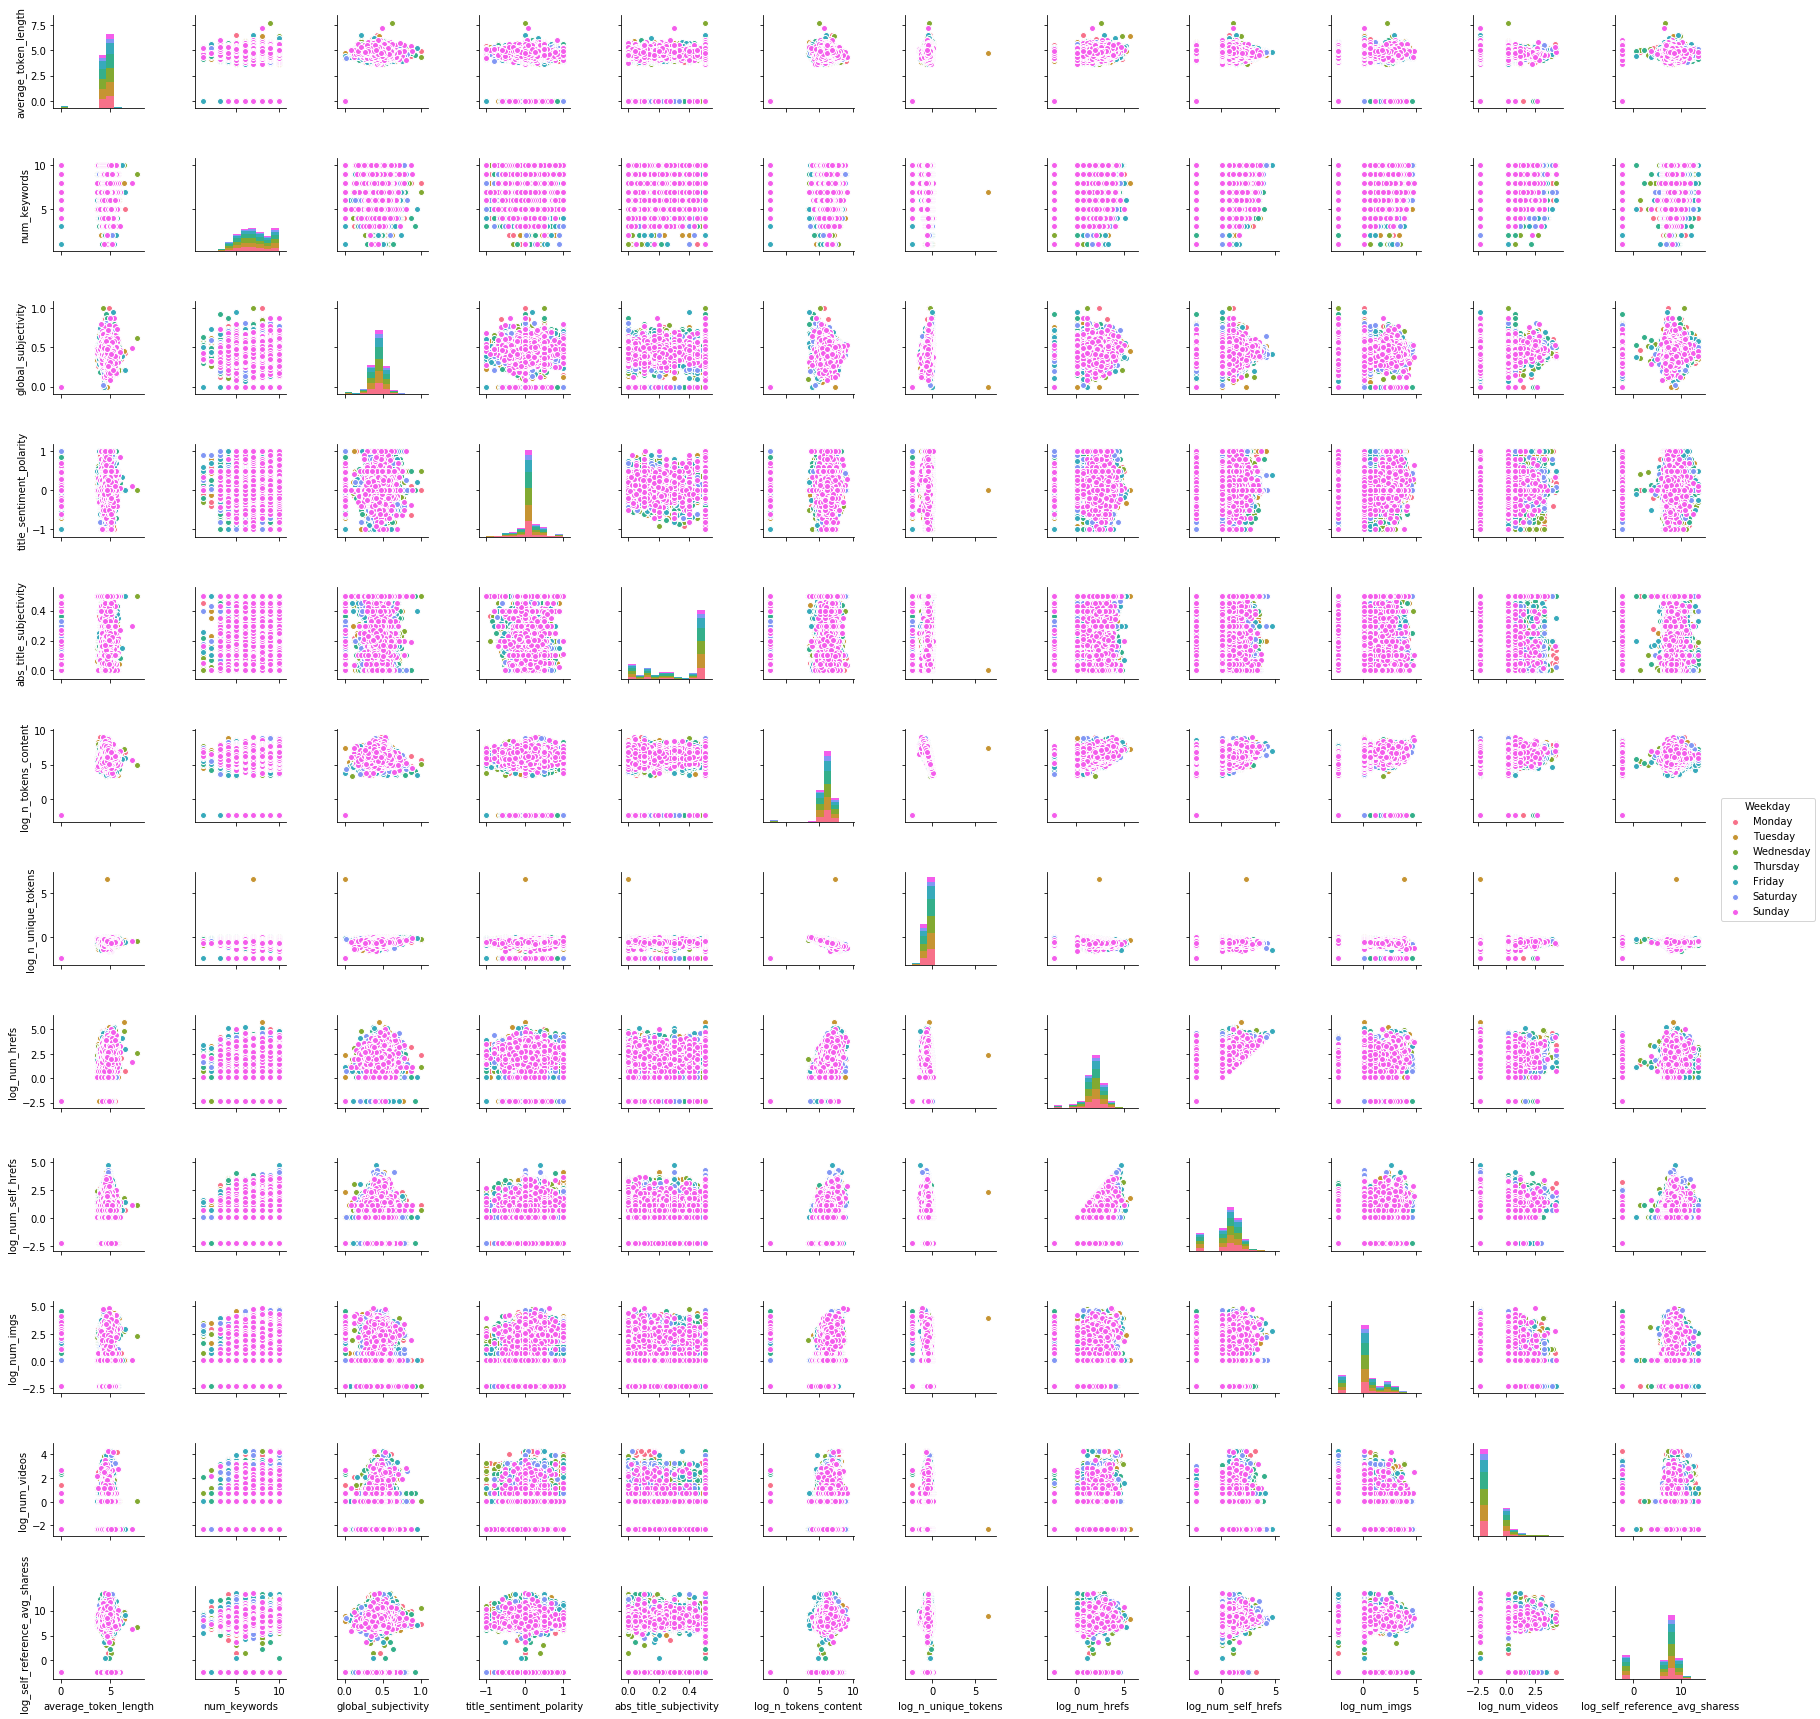

In [26]:
# Pairplot for log transformed variables, as grouped by Weekday

sns.pairplot(df, vars=['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
                       'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue="Weekday", palette="husl", size=2)

# Put the pairplot or scatterplot for all the varibles or just mention we did it?

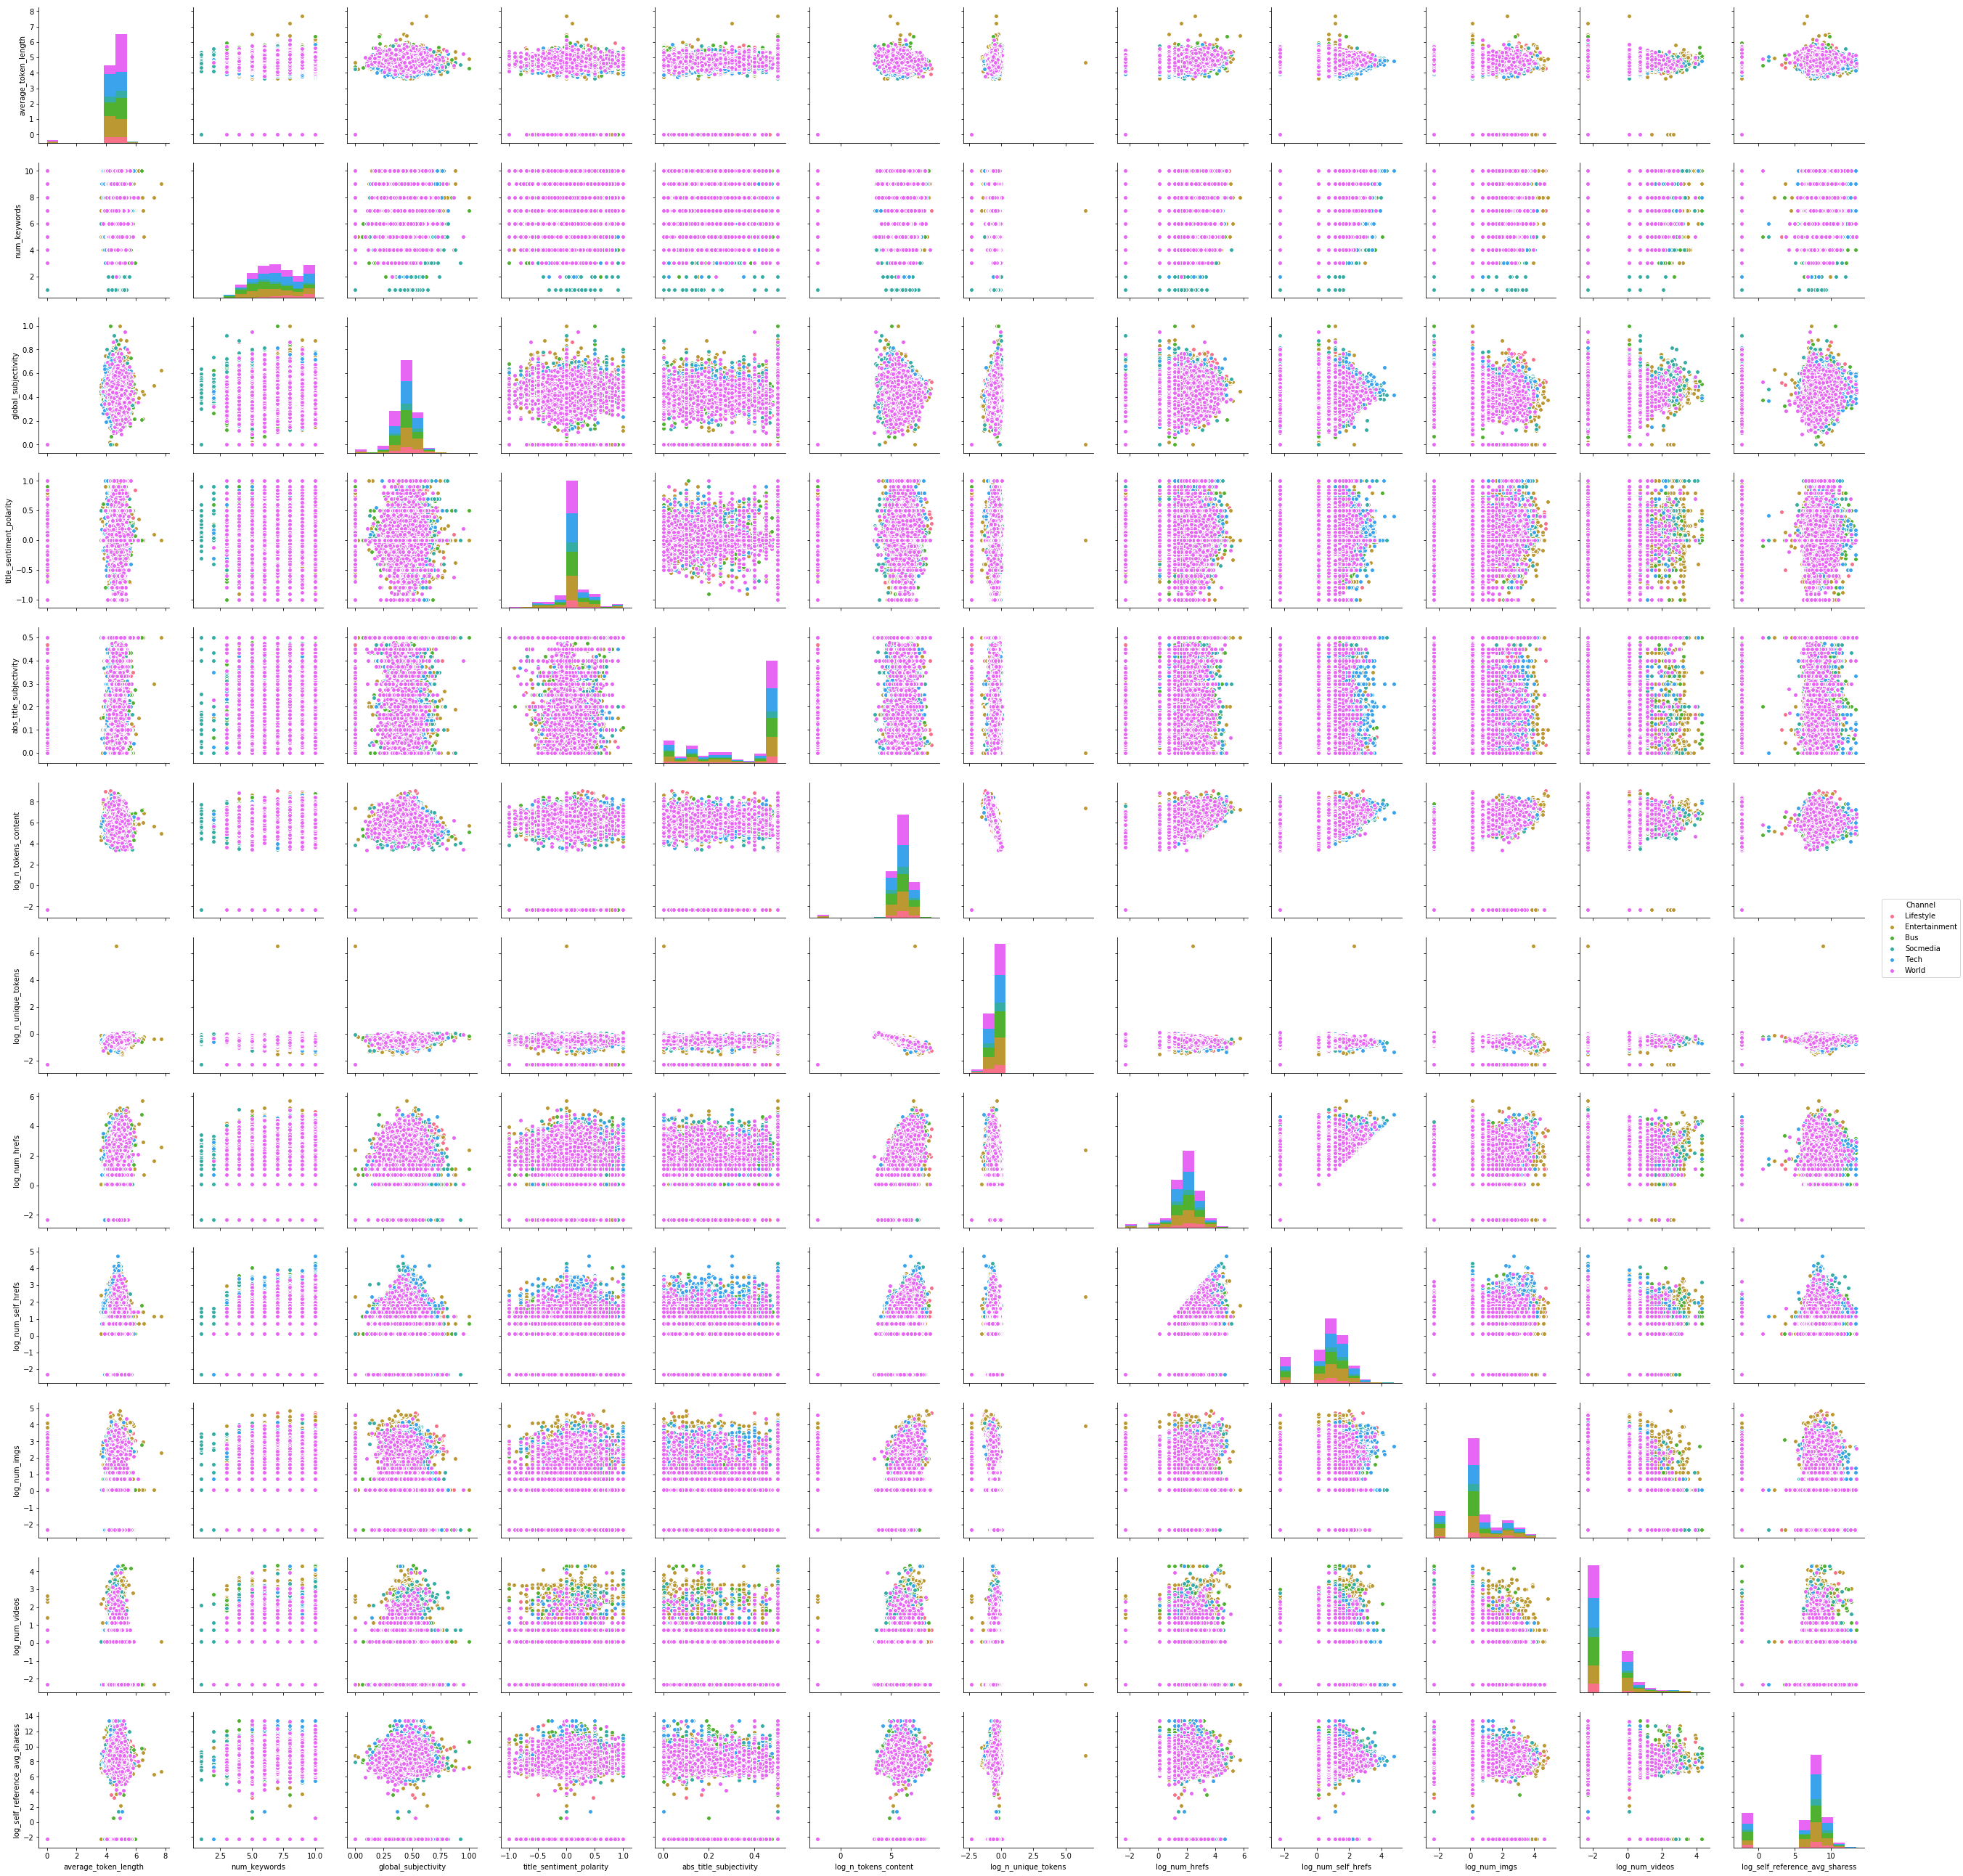

In [27]:
# Pairplot for log transformed variables, as grouped by Channel

sns.pairplot(df, vars=['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
                       'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue="Channel", palette="husl", size=3)

### 07. Explore Attributes and Class (10)

* Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).*


* We took natural log of these Words related features variables(non-stop words, non-stop unique tokens, unique tokens) to dampen the effect of extreme values, reduce the range of data, counter effects of outliers and make the distribution look like that of lognormal density. Even after taking log of the variable "log_n_non_stop_words", We can see that from the boxplot below, the number of non-stop words in almost all articles is around the same(just above 0 around .1 on log scale), thus has very non-normal distribution. Also we can see from the correlation table and the correlation heatmap of 'log_n_non_stop_words','log_n_non_stop_unique_tokens','log_n_unique_tokens' variables are highly correlated to each other (greater than 0.83), thus keeping all 3 varibles to build the multiple regression model is redundant. Note that they are not correlated with log_shares dependant variable having correlation coefficient close to Zero. the feature varible "log_n_unique_tokens" amoung these 3 varibles had close to normal distribution and it is somewhat correlated with log_shares, Thus we can drop these variables 'log_n_non_stop_words','log_n_non_stop_unique_tokens'and will only consider log_n_unique_tokens feature for model building.

/Users/shanqinggu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


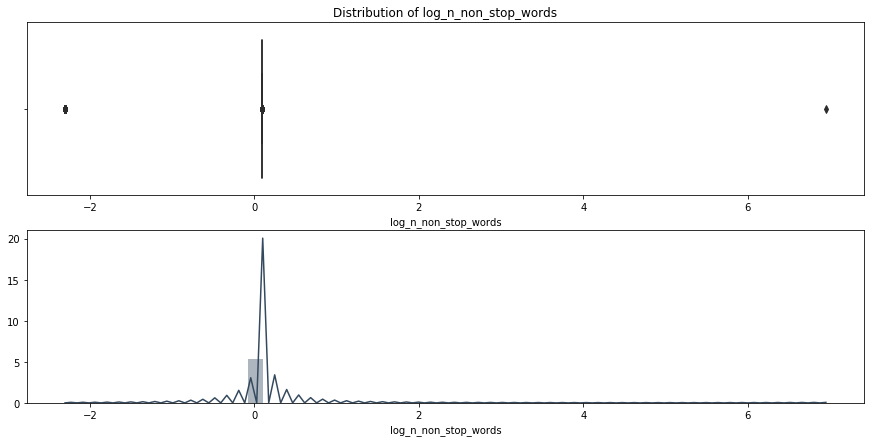

In [28]:
#sns.boxplot(x= df['log_n_non_stop_words'])
# Pairplot for log transformed variables, as grouped by Weekday

f, (ax0,ax2) = plt.subplots(nrows=2, ncols=1, figsize=[15, 7])
sns.boxplot(df['log_n_non_stop_words'], ax=ax0, color="#34495e").set_title('Distribution of log_n_non_stop_words');
sns.distplot(df['log_n_non_stop_words'], ax=ax2, color="#34495e");



                              log_n_non_stop_words  \
log_n_non_stop_words                      1.000000   
log_n_non_stop_unique_tokens              0.895739   
log_n_unique_tokens                       0.830301   
log_shares                               -0.017820   

                              log_n_non_stop_unique_tokens  \
log_n_non_stop_words                              0.895739   
log_n_non_stop_unique_tokens                      1.000000   
log_n_unique_tokens                               0.966863   
log_shares                                       -0.041660   

                              log_n_unique_tokens  log_shares  
log_n_non_stop_words                     0.830301   -0.017820  
log_n_non_stop_unique_tokens             0.966863   -0.041660  
log_n_unique_tokens                      1.000000   -0.049625  
log_shares                              -0.049625    1.000000  


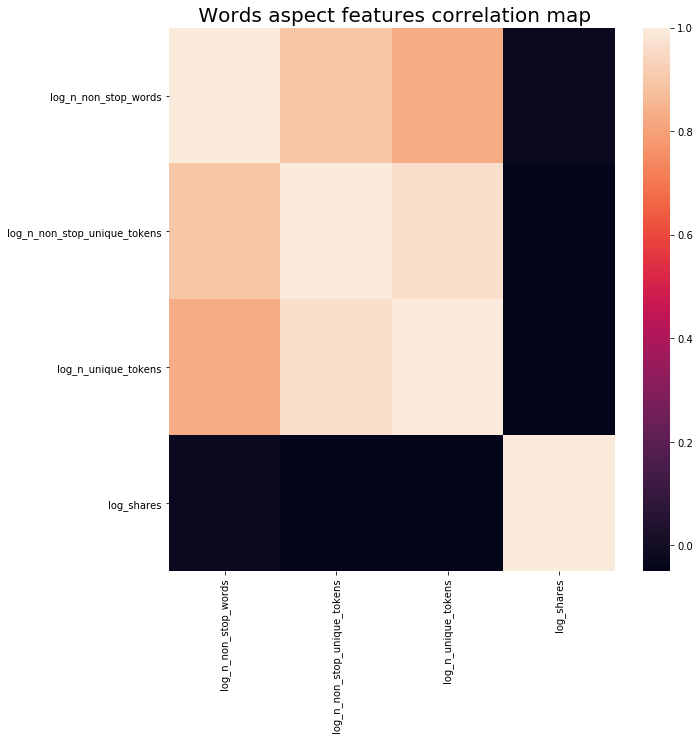

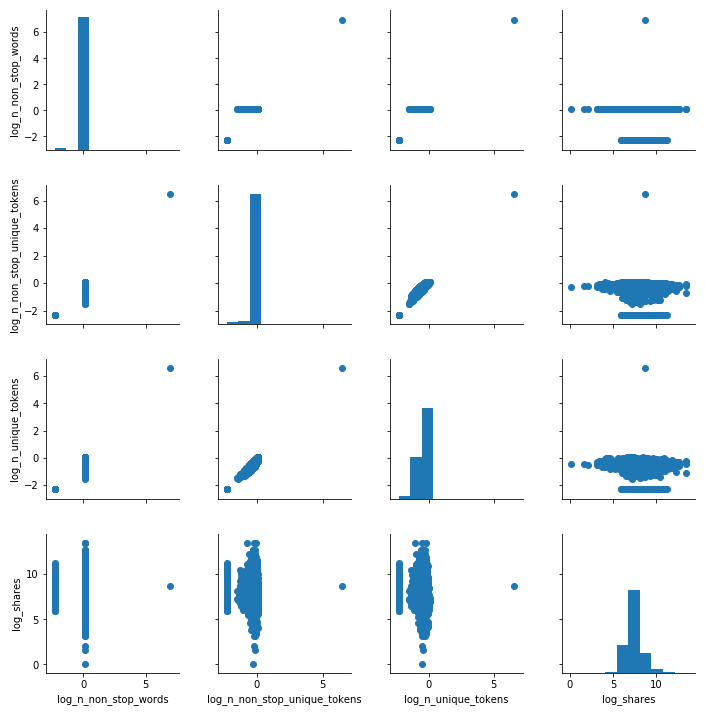

In [29]:
#words_vars=[' log_n_non_stop_words',' log_n_non_stop_unique_tokens',' log_n_unique_tokens', ' log_shares']
words_cols = df[['log_n_non_stop_words','log_n_non_stop_unique_tokens','log_n_unique_tokens', 'log_shares']].copy()
words_cols.describe()

print(words_cols.corr())
corrs = words_cols.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title(" Words aspect features correlation map", fontsize=20)

g = sns.PairGrid(words_cols)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

* The variables 19 to 27: ' kw_min_min',' kw_max_min',' kw_avg_min', ' kw_min_max',' kw_max_max', ' kw_avg_max',' kw_min_avg',' kw_max_avg', ' kw_avg_avg' which have information about the number of keywords. Here, these variables are average, minimum and maximum of the keywords. The average encompasses information from the minimum and maximum so, there is some collinearity between these variables. To reduce effects of multicollinearity, we will removed the variables with suffix “_min_” and “_max_” while keeping “_avg_”. Similarly, the variables 28,29,30 ' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess' are highly correlated to the corresponding variable “_avg_.”. Thus we will removed the variables with suffix “_min_” and “_max_” and will keeping ' self_reference_avg_sharess'. 

In [47]:
words_cols = dfCopy[[' kw_min_min',' kw_max_min',' kw_avg_min', ' kw_min_max',' kw_max_max', ' kw_avg_max',' kw_min_avg',' kw_max_avg', ' kw_avg_avg']].copy()
words_cols.describe()

print(words_cols.corr())

              kw_min_min   kw_max_min   kw_avg_min   kw_min_max   kw_max_max  \
 kw_min_min     1.000000     0.011534     0.112829    -0.062433    -0.857226   
 kw_max_min     0.011534     1.000000     0.940529    -0.036475    -0.005425   
 kw_avg_min     0.112829     0.940529     1.000000    -0.062958    -0.106933   
 kw_min_max    -0.062433    -0.036475    -0.062958     1.000000     0.065866   
 kw_max_max    -0.857226    -0.005425    -0.106933     0.065866     1.000000   
 kw_avg_max    -0.502719    -0.034936    -0.129136     0.411493     0.563353   
 kw_min_avg    -0.137094     0.007079    -0.021295     0.353099     0.158727   
 kw_max_avg    -0.073563     0.590468     0.545686     0.028394     0.092658   
 kw_avg_avg    -0.184018     0.411261     0.384317     0.172242     0.226998   

              kw_avg_max   kw_min_avg   kw_max_avg   kw_avg_avg  
 kw_min_min    -0.502719    -0.137094    -0.073563    -0.184018  
 kw_max_min    -0.034936     0.007079     0.590468     0.411261  
 

                              self_reference_min_shares  \
 self_reference_min_shares                     1.000000   
 self_reference_max_shares                     0.480476   
 self_reference_avg_sharess                    0.818907   

                              self_reference_max_shares  \
 self_reference_min_shares                     0.480476   
 self_reference_max_shares                     1.000000   
 self_reference_avg_sharess                    0.853480   

                              self_reference_avg_sharess  
 self_reference_min_shares                      0.818907  
 self_reference_max_shares                      0.853480  
 self_reference_avg_sharess                     1.000000  


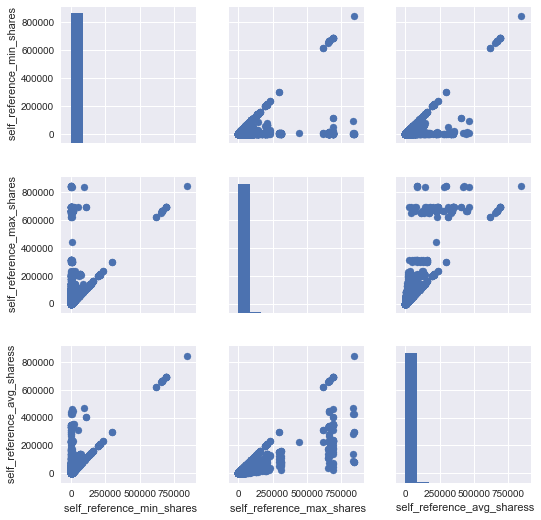

In [45]:
words_cols = dfCopy[[' self_reference_min_shares',' self_reference_max_shares',' self_reference_avg_sharess']].copy()
words_cols.describe()

print(words_cols.corr())
g = sns.PairGrid(words_cols)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

* The variables 50 to 55: ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity' which have information about the polarity of positive keywords and negative keyword. Here, these variables are average, minimum and maximum of the keyword polarity. The average encompasses information from the minimum and maximum so, there is some collinearity between these variables. Thus we might consider about keeping only the variables with “_avg_.” suffix in it. 

                         avg_positive_polarity   min_positive_polarity  \
 avg_positive_polarity                1.000000                0.456973   
 min_positive_polarity                0.456973                1.000000   
 max_positive_polarity                0.703558                0.009600   
 avg_negative_polarity               -0.275705               -0.063571   
 min_negative_polarity               -0.232209                0.091270   
 max_negative_polarity               -0.139768               -0.183997   

                         max_positive_polarity   avg_negative_polarity  \
 avg_positive_polarity                0.703558               -0.275705   
 min_positive_polarity                0.009600               -0.063571   
 max_positive_polarity                1.000000               -0.268784   
 avg_negative_polarity               -0.268784                1.000000   
 min_negative_polarity               -0.360871                0.748896   
 max_negative_polarity               

Text(0.5,1,' Words aspect features correlation map')

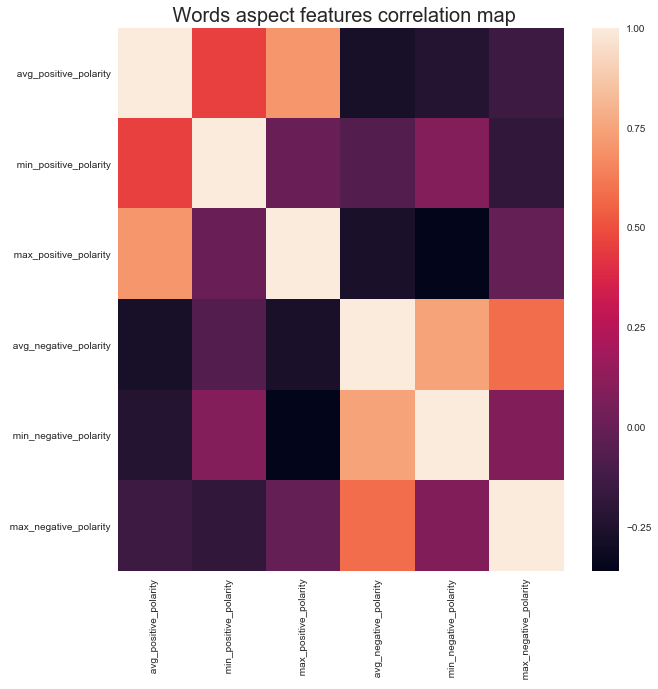

In [43]:
words_cols = dfCopy[[' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity']].copy()

print(words_cols.corr())

corrs = words_cols.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title(" Words aspect features correlation map", fontsize=20)


### 08. New Features (5)

* Are there other features that could be added to the data or created from existing features? Which ones? *


### 09. Exceptional Work (10)

* You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.*

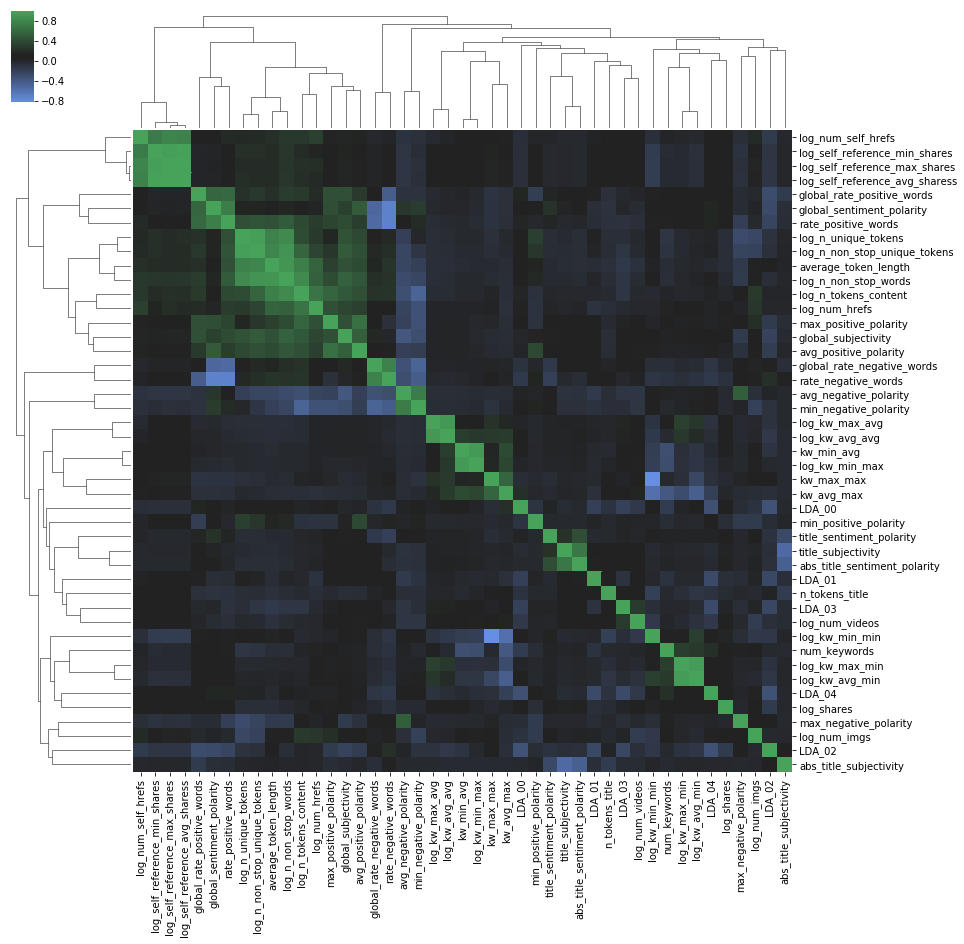

In [37]:
numeric = [c for i,c in enumerate(df.columns) if df.dtypes[i] in [np.float64, np.int64]]
len(numeric)

# Correlation 
cmap = sns.diverging_palette(255, 133, l=60, n=7, as_cmap=True, center="dark")
sns.clustermap(df[numeric].corr(), figsize=(14, 14), cmap=cmap);

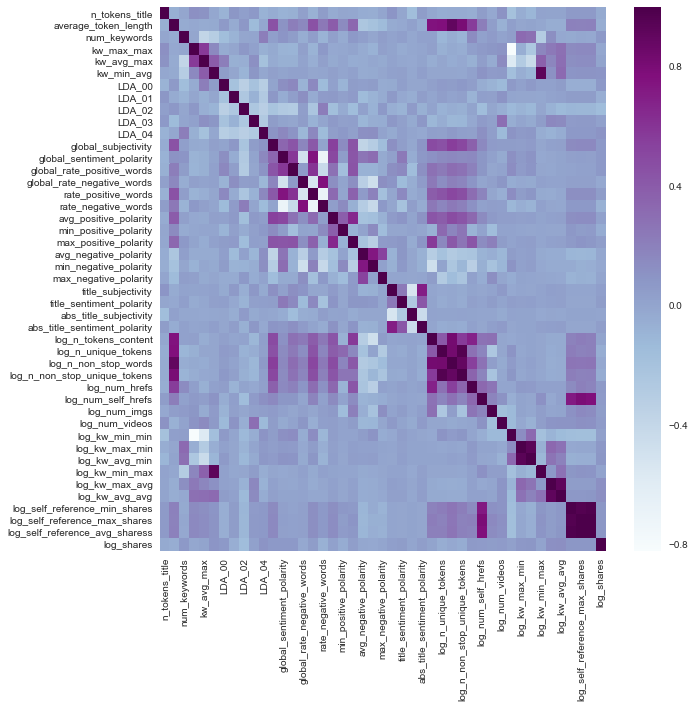

In [38]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

df_heatmap = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap="BuPu")

In [39]:
# Cut log_shares into 2 groups (0, 1)

df_cut = df['log_shares_cut'] = pd.qcut(df['log_shares'], 2, labels = ('unpopular', 'popular'))

In [40]:
# Get 'log_shares' position
df.columns.get_loc('log_shares')

46

In [41]:
# Drop the above column
df.drop(df.columns[46], axis=1, inplace=True)

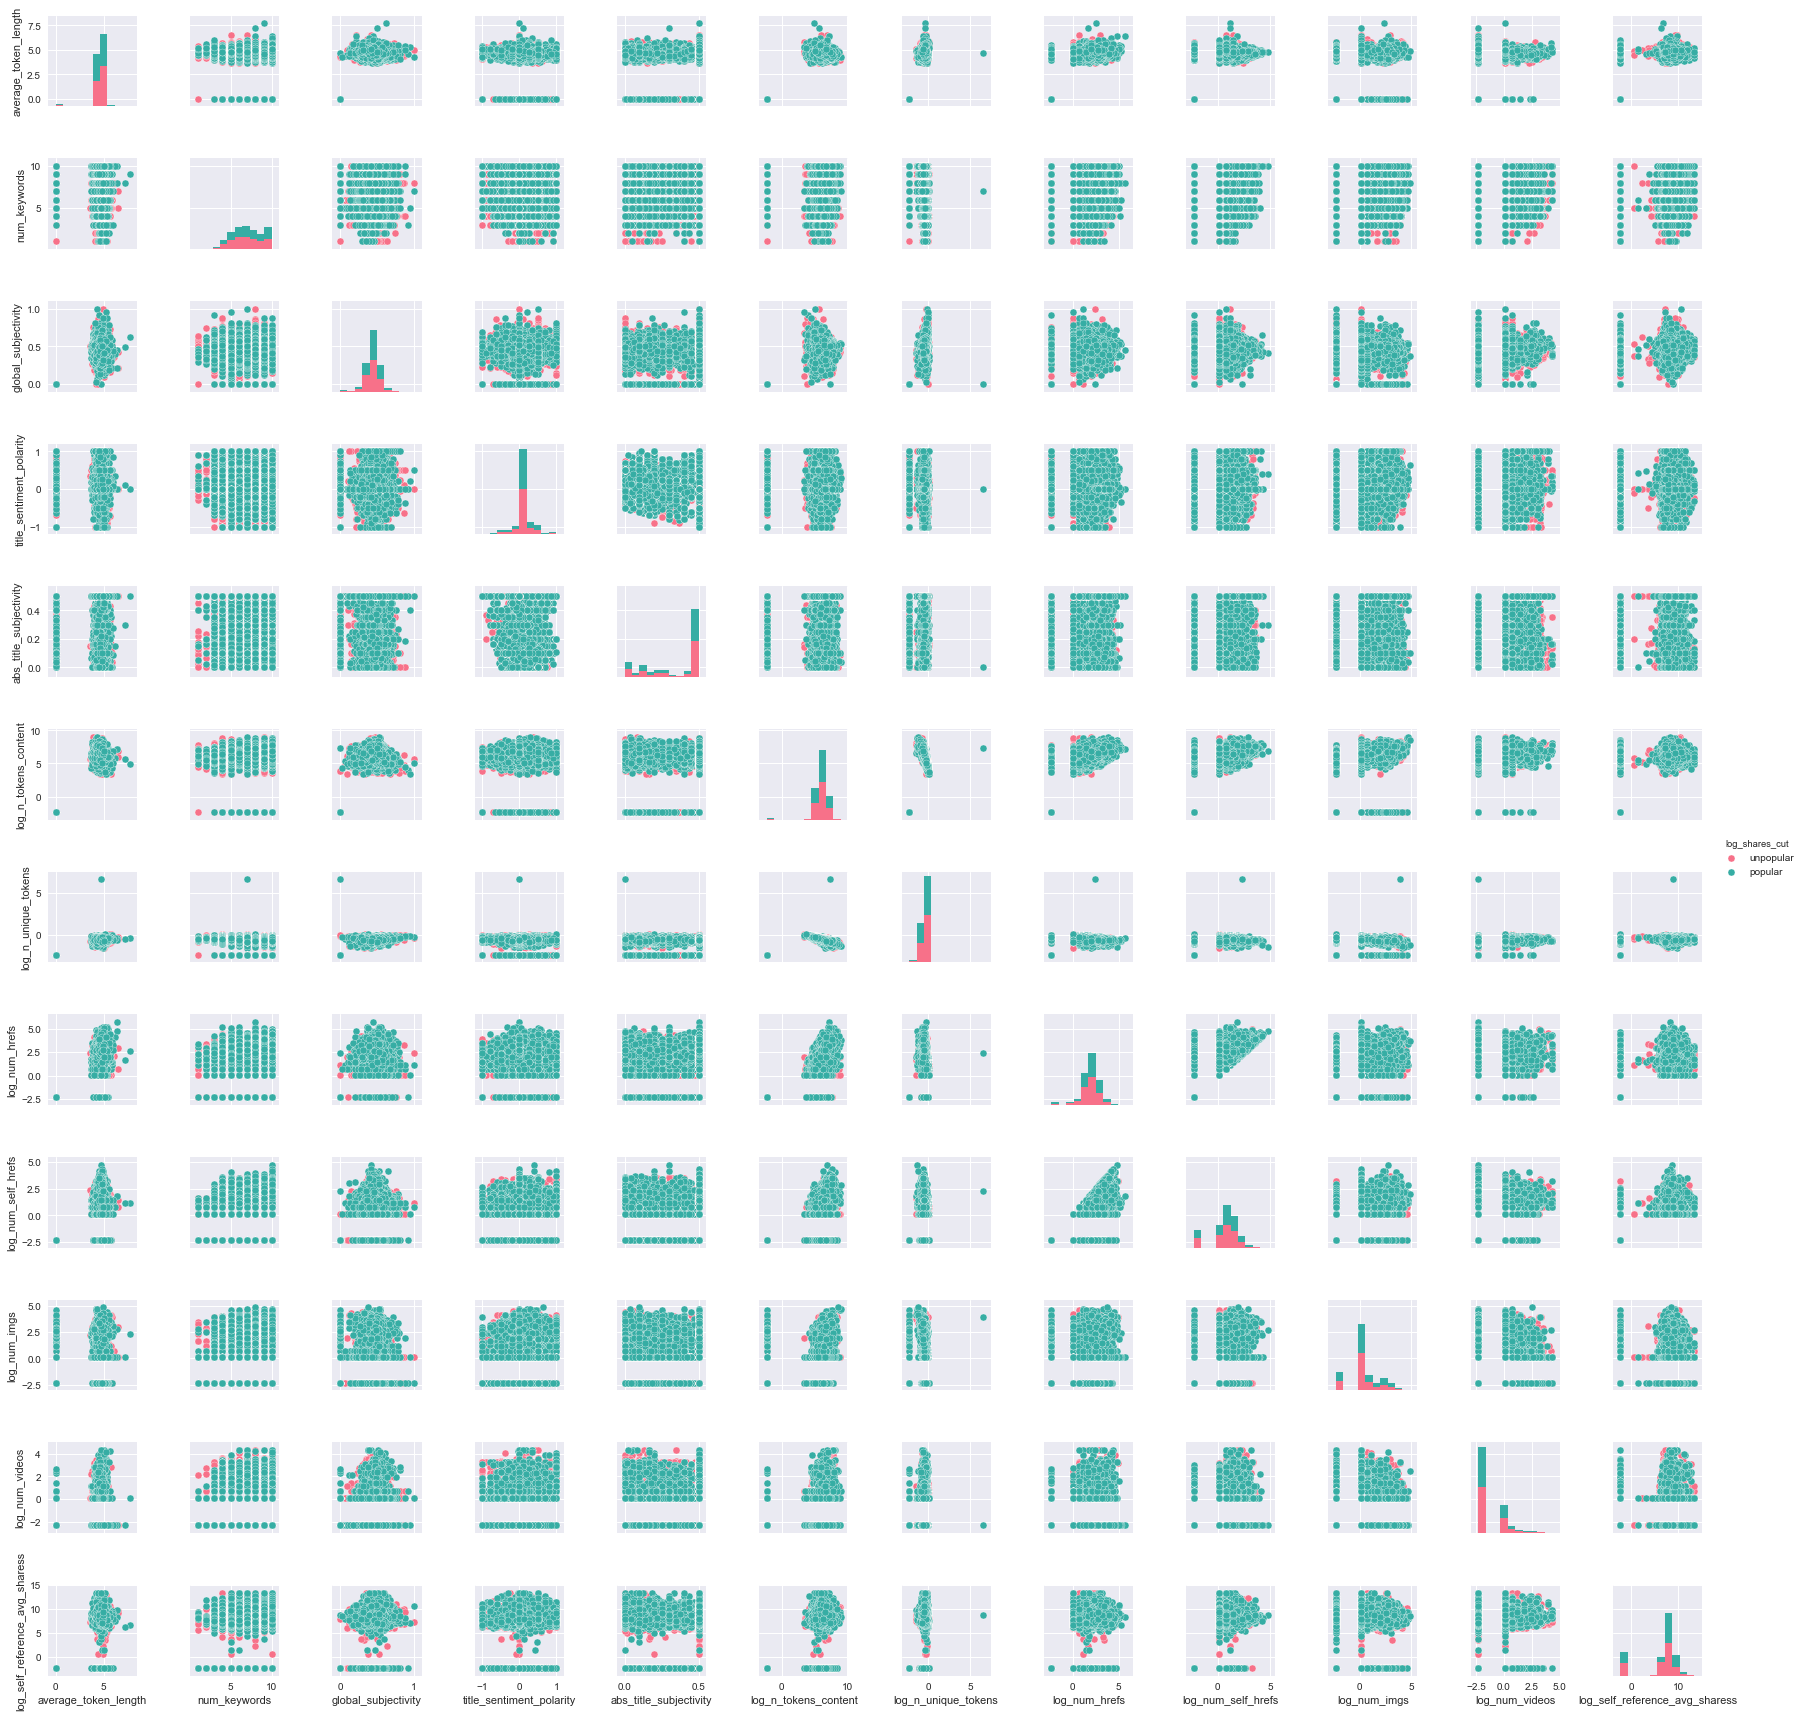

In [42]:
# Samples for pairplot as group by the log_share_cut (0, 1)

sns.pairplot(df, vars = ['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
                       'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs', 
                       'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess'], hue = "log_shares_cut", palette="husl", size=2)

In [51]:
# Pick log transformed variables, transform and prepare for PCA 

from sklearn.preprocessing import StandardScaler
features = ['average_token_length', 'num_keywords', 'global_subjectivity','title_sentiment_polarity',
            'abs_title_subjectivity', 'log_n_tokens_content', 'log_n_unique_tokens','log_num_hrefs',
            'log_num_self_hrefs','log_num_imgs', 'log_num_videos', 'log_self_reference_avg_sharess']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['log_shares_cut']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [52]:
# Try PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [53]:
# Concat two component and prepare to plot

finalDf = pd.concat([principalDf, df[['log_shares_cut']]], axis = 1)
finalDf.head(10)

principal component 1  principal component 2 log_shares_cut
0              -1.684700              -1.913425      unpopular
1               1.010819               2.862638      unpopular
2               0.416002               0.751330        popular
3               1.469637               2.239519      unpopular
4              -0.155334               1.734597      unpopular
5              -0.315230              -0.641018      unpopular
6              -1.780766              -1.912482      unpopular
7               0.893568               2.773147      unpopular
8               0.090845              -1.091994        popular
9               0.644319               2.873947      unpopular

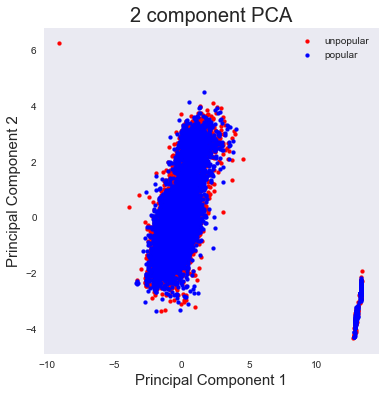

In [54]:
# Plot 2 component PCA

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
log_shares_cuts = ['unpopular', 'popular'] # 0 = unpopular, 1 = popular
colors = ['r', 'b']

for log_shares_cut, color in zip(log_shares_cuts, colors):
    indicesToKeep = finalDf['log_shares_cut'] == log_shares_cut
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 15)
ax.legend(log_shares_cuts)
ax.grid()